# LAB 07.02 - Neural networks

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


In [2]:
from local.lib.rlxmoocapi import submit, session
student = session.Session(init.endpoint).login( course_id=init.course_id, 
                                                lab_id="L07.02" )

In [4]:
import numpy as np
from IPython.display import Image
try:
    %tensorflow_version 2.x
    print ("Using TF2 in Google Colab")
except:
    pass

import tensorflow as tf

## Task 1. Compute softmax output

You have a classification problem with $n_c$ classes. You have a dataset of $m$ elements and you are given:


- $\hat{\mathbf{y}} \in \mathbb{R}^{m\times n_c}$, the **logits** of the output layer of a neural network

compute $\hat{\bar{\mathbf{y}}}$ the softmax output corresponding the given **logits**, as explained in the notes.

**NOTE**: You will not be able to use tensorflow in your solution. The grader will penalize you if you do.

**CHALLENGE**: Use a single line of Python code

In [5]:
def softmax(y_hat):
    return ... # YOUR CODE HERE

check your code against Tensorflow. Your answer must be exactly the same

In [5]:

m = np.random.randint(10)+10
nc = np.random.randint(5)+5
y_hat = np.round(np.random.normal(size=(m,nc)), 2)
y_hat


array([[-0.84, -0.29,  0.66,  1.14,  1.31,  0.88, -0.2 ],
       [-0.69,  0.05,  1.68, -0.62,  0.31, -0.13, -0.68],
       [-1.47, -0.37, -1.86, -0.15,  1.12, -0.59, -0.4 ],
       [ 0.98, -0.53,  1.33,  0.32, -0.85, -0.05, -0.63],
       [-1.39, -0.12, -1.44,  0.12,  1.2 , -0.23, -0.11],
       [-1.23,  0.1 , -0.07, -1.47,  0.88,  0.04,  0.53],
       [-0.59, -0.83, -1.23, -1.05,  0.45,  0.12,  1.62],
       [-1.02, -0.17, -0.41, -2.29, -1.17,  0.25, -1.32],
       [-0.48, -2.1 ,  2.4 , -0.21,  0.51, -0.42,  0.75],
       [-1.03, -0.53, -2.42,  0.5 , -0.48, -0.71,  0.25],
       [-1.89, -1.79,  0.38, -0.44, -0.3 ,  0.29, -2.53],
       [ 0.84,  0.26, -0.03, -1.89,  2.42,  0.04, -0.11]])

In [7]:
my_output = softmax(y_hat)
my_output

In [8]:
tf_output = tf.nn.softmax(y_hat).numpy()
tf_output

In [14]:
np.allclose(my_output, my_output)

**submit your code**

In [26]:
student.submit_task(globals(), task_id="task_01");

## Task 2: Compute cross entropy

you are also given

- $\mathbf{y}$, a vector of $m$ elements, each elemet being an integer between $0$ and $n_c-1$, corresponding to the labels of your dataset.

Complete the following function to compute cross entropy as explained in the notes. Observe that you are given:

- $\mathbf{y}$ with the original class labels. You will have to convert it to a one hot encoding.
- $\hat{\bar{\mathbf{y}}}$ the softmax activations such as from the output on your previous function

**NOTE**: You will not be able to use tensorflow in your solution. The grader will penalize you if you do.

**SUGGESTION**: Use `np.log(expression+1e-10)` for any `expression` better than `np.log(expression)` since this will avoid numeric errors if `expression` evaluates to 0. Recall that `1e-10` is $10^{-10}$

**CHALLENGE**: Use a single line of Python code

In [120]:
def cross_entropy(y, y_hatb):
    return ... # YOUR CODE HERE

check your answer against **Tensorflow** corresponding implementation

In [19]:
m = np.random.randint(10)+10
nc = np.random.randint(5)+5

y = np.random.randint(nc, size=m)
y_hatb = np.random.random(size=(m, nc))
y_hatb /= np.sum(y_hatb, axis=1).reshape(-1,1)

print (y)
print (y_hatb)
print (y_hatb.sum(axis=1))

In [20]:
cross_entropy(y, y_hatb)

In [21]:
tf.keras.losses.sparse_categorical_crossentropy(y, y_hatb).numpy()

**submit your code**

In [29]:
student.submit_task(globals(), task_id="task_02");

## Task 3: Compute multilayer perceptron network output

You have 

- a dataset of $m$ elements and $n$ columns.
- a classification problem with $n_c$ classes. 

And we build a multilayer perceptron with 
- two hidden layers with $h_1$ and $h_2$ neurons respectively and **tanh** activation.
- one output layer with $n_c$ neurons with **softmax** activation.

so that we have the following architecture

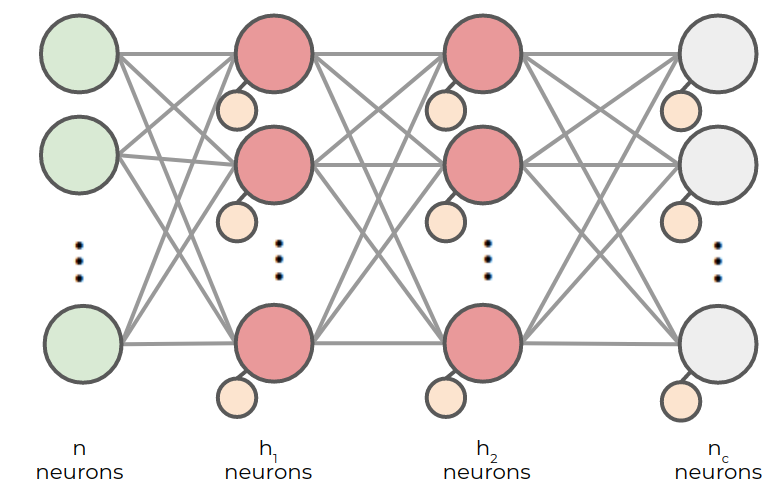

In [28]:

Image("local/imgs/labmlp.png", width=500)


This way, we have the following set of weights:

- $W_0 \in \mathbb{R}^{n\times h_1}$ 
- $b_0 \in \mathbb{R}^{h_1}$ 


- $W_1 \in \mathbb{R}^{h1\times h_2}$ 
- $b_1 \in \mathbb{R}^{h_2}$ 


- $W_2 \in \mathbb{R}^{h2\times n_c}$ 
- $b_2 \in \mathbb{R}^{n_c}$ 

Complete the function below so that it produces the following output:

$$\text{softmax}(\text{tanh}(\text{tanh}(\mathbf{X}\cdot\mathbf{W}_0+b_0)\cdot\mathbf{W}_1+b_1)\cdot\mathbf{W}_0+b_0)$$


**NOTE**: You will not be able to use tensorflow in your solution. The grader will penalize you if you do.

**CHALLENGE**: Use a single line of Python code (not counting your previous `softmax` function).

In [70]:
def nn_output(X, W0, b0, W1, b1, W2, b2):
    def softmax .... # use your softmax from task above
    
    return ... # YOUR CODE HERE

check your code with random input and weights against the implementation in **Tensorflow**

In [31]:
m = np.random.randint(10)+10
n = np.random.randint(3)+3
nc = np.random.randint(5)+5

m = 10
n = 3
nc = 4

h1 = np.random.randint(5)+5
h2 = np.random.randint(5)+5

print (m,n,nc)

X = np.random.normal(size=(m,n))
W0 = np.random.normal(size=(n,h1))
b0 = np.random.normal(size=h1)
W1 = np.random.normal(size=(h1,h2))
b1 = np.random.normal(size=h2)
W2 = np.random.normal(size=(h2,nc))
b2 = np.random.normal(size=nc)


your function output

In [32]:
nn_output(X, W0, b0, W1, b1, W2, b2)

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(h1, activation='tanh', dtype=tf.float64),
    tf.keras.layers.Dense(h2, activation='tanh', dtype=tf.float64),
    tf.keras.layers.Dense(nc, activation='softmax', dtype=tf.float64)
])
model.build(input_shape=[None, n])
model.set_weights([W0, b0, W1, b1, W2, b2])

tensorflow output (must be exactly as yours)

In [34]:
model(X).numpy()

**submit your code**

In [40]:
student.submit_task(globals(), task_id="task_03");